In [1]:
import tensorflow as tf
from lib.mnist_aug.mnist_augmenter import DataManager, MNISTAug
import numpy as np

In [2]:
aug = MNISTAug()
aug.min_objects = 1
aug.max_objects = 1

In [3]:
dm = DataManager()
dm.load()

In [4]:
x_train, y_train = aug.get_augmented(dm.x_train, dm.y_train, 1000)
x_test, y_test = aug.get_augmented(dm.x_test, dm.y_test, 2)

/Users/akhildevarashetti/code/ml_gallery/ml_py/venv/lib/python3.8/site-packages/skimage/transform/_warps.py:115: RuntimeWarning: divide by zero encountered in true_divide
  factors = (np.asarray(input_shape, dtype=float) /


cannot convert float infinity to integer
cannot convert float infinity to integer
cannot convert float infinity to integer


In [5]:
x_train = x_train.reshape(-1, 1, 112, 112)
x_test = x_test.reshape(-1, 1, 112, 112)

/Users/akhildevarashetti/code/ml_gallery/ml_py/lib/mnist_aug/mnist_augmenter.py:215: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[{'class': 8,
  'class_one_hot': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  'x1': 70,
  'y1': 59,
  'x2': 106,
  'y2': 95,
  'cx': 88.0,
  'cy': 77.0,
  'height': 36,
  'width': 36}]

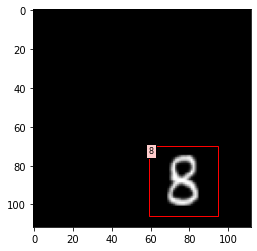

In [6]:
DataManager.plot_num(x_train[1].reshape((112, 112)), y_train[1])
y_train[1]

In [7]:
anchor_cx = 56
anchor_cy = 56
anchor_w = 28

In [14]:
def units_to_diff(y):
    y_d = []
    for i in range(len(y)):
        cx_d = (y[i][0]['cx'] - anchor_cx) / 112
        cy_d = (y[i][0]['cy'] - anchor_cy) / 112
        w_d = (y[i][0]['width'] - anchor_w) / 112
        y_d.append((cx_d, cy_d, w_d))
    return np.array(y_d)

def diff_to_units(y):
    y_units = []
    for i in range(len(y)):
        cx_d = y[i][0] * 112 + anchor_cx
        cy_d = y[i][1] * 112 + anchor_cy
        wd = y[i][2] * 112 + anchor_w
        y_units.append((cx_d, cy_d, wd))
    return np.array(y_units)

In [9]:
print(y_test)
y_d_test = units_to_diff(y_test)
print(y_d_test)
y_d_unwrapped = diff_to_units(y_d_test)
print(y_d_unwrapped)

[[{'class': 7, 'class_one_hot': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'x1': 74, 'y1': 60, 'x2': 82, 'y2': 68, 'cx': 78.0, 'cy': 64.0, 'height': 8, 'width': 8}], [{'class': 4, 'class_one_hot': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'x1': 64, 'y1': 76, 'x2': 99, 'y2': 111, 'cx': 81.5, 'cy': 93.5, 'height': 35, 'width': 35}]]
0 [{'class': 7, 'class_one_hot': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'x1': 74, 'y1': 60, 'x2': 82, 'y2': 68, 'cx': 78.0, 'cy': 64.0, 'height': 8, 'width': 8}]
1 [{'class': 4, 'class_one_hot': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'x1': 64, 'y1': 76, 'x2': 99, 'y2': 111, 'cx': 81.5, 'cy': 93.5, 'height': 35, 'width': 35}]
[[ 0.19642857  0.07142857 -0.17857143]
 [ 0.22767857  0.33482143  0.0625    ]]
[[78.  64.   8. ]
 [81.5 93.5 35. ]]


In [15]:
y_d = units_to_diff(y_train)
y_d_test = units_to_diff(y_test)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(3)
])
model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

In [12]:
epochs = 20
batch_size = 100

model.fit(x_train, y_d, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_d_test))

Epoch 1/20
10/10 [==============================] - 1s 116ms/step - loss: 0.0275 - accuracy: 0.5790 - val_loss: 0.0227 - val_accuracy: 0.0000e+00
Epoch 2/20
10/10 [==============================] - 1s 100ms/step - loss: 0.0208 - acc

y_pred=array([[ 0.08475551,  0.07535661, -0.15266277],
       [ 0.21626346,  0.3673405 , -0.03757386]], dtype=float32)
y_d_test=array([[ 0.19642857,  0.07142857, -0.17857143],
       [ 0.22767857,  0.33482143,  0.0625    ]])
[{'x1': 60.04173219203949, 'y1': 58.98905539512634, 'x2': 70.94350206851959, 'y2': 69.89082527160645}]
[{'x1': 68.32564321160316, 'y1': 85.24627247452736, 'x2': 92.11737141013145, 'y2': 109.03800067305565}]


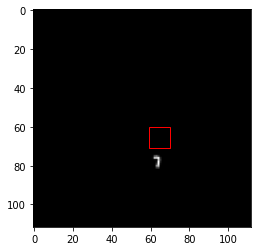

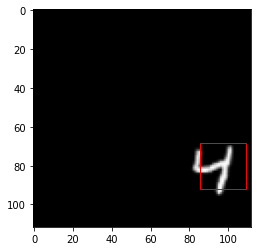

In [13]:
y_pred = model.predict(x_test)

print(f'{y_pred=}\n{y_d_test=}')

y_pred = diff_to_units(y_pred)
for i in range(len(y_pred)):

    cx_pred, cy_pred, w_pred = y_pred[i]
    pred_boxes = [{
        'x1': float(cx_pred - w_pred / 2),
        'y1': float(cy_pred - w_pred / 2),
        'x2': float(cx_pred + w_pred / 2),
        'y2': float(cy_pred + w_pred / 2)
    }]

    # pred_boxes.extend(list(y_test[i]))
    print(f'{pred_boxes}')

    DataManager.plot_num(x_test[i].reshape((112, 112)), pred_boxes)
